<a href="https://colab.research.google.com/github/champ-rtu/CE888/blob/main/Lap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score

In [2]:
#import data 
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#Check missing value 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
#identify propotion of label
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

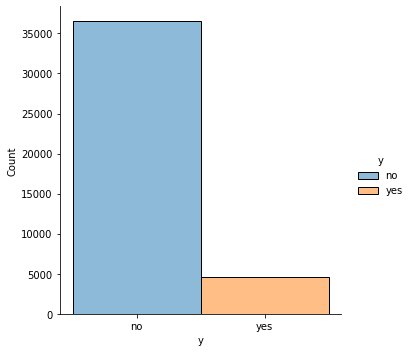

In [6]:
#Visualize propotion of label that are imbalance. 
sns_plot = sns.displot(x=df['y'], data=df, hue="y")

In [7]:
feature = df.drop(['y','duration'], axis=1)

In [8]:
#Applied LabelEncoder to covert non-numeric data to numerical data
for column in feature.columns:
  if feature[column].dtypes == type(object):
    le = LabelEncoder()
    feature[column] = le.fit_transform(feature[column])
feature.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [51]:
#Applied LabelEncoder to covert non-numeric data to numerical data
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
label = df['y']


**In this part, data are divided to train and test dataset. Futhermore, data are trained by RandomForset model and evaluate this model by F1-score**

In [10]:
#divided dataset to 80 percent training and 20 percent  for test 
x_train,x_test,y_train,y_test = train_test_split(feature,label,
                                                 test_size=0.2,
                                                 random_state=50,
                                                 stratify=label)

In [11]:
#applied StratifiedFold to split data in 10 fold
kf = StratifiedKFold(n_splits=10)


In [54]:
#Create RandomForest model with 100 trees and depth = 3 and evaluate by use F1 score
clf = RandomForestClassifier(n_estimators=100,max_depth=3)
score = cross_val_score(clf,x_train,y_train, cv = kf, scoring='f1')


In [55]:
for i in range(len(score)) :
  print('Fold',i+1,' ', score[i])
  
print('Average', score.mean())

Fold 1   0.2363238512035011
Fold 2   0.29501084598698485
Fold 3   0.23946784922394682
Fold 4   0.28070175438596495
Fold 5   0.2266666666666667
Fold 6   0.2993492407809111
Fold 7   0.3811475409836066
Fold 8   0.2599118942731277
Fold 9   0.2610619469026549
Fold 10   0.2777777777777778
Average 0.2757419368185142


In [56]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
score_dummy = cross_val_score(dummy_clf,x_train,y_train, cv = kf, scoring='f1')

In [60]:

print('Average', score_dummy.mean())

Average 0.11646364936926194


In [65]:
#Create RandomForest model with 150 trees and depth = 6 and evaluate by use F1 score
clf2 = RandomForestClassifier(n_estimators=150,max_depth=6, random_state=60)
score2 = cross_val_score(clf2,x_train,y_train, cv = kf, scoring='f1')

In [66]:
print('Average', score2.mean())

Average 0.3050884934171324


In [63]:
#Create RandomForest model with 1000 trees and depth = 8 and evaluate by use F1 score
clf3 = RandomForestClassifier(n_estimators=1000,max_depth=8, random_state=60)
clf3.fit(x_train,y_train)
score3 = cross_val_score(clf3,x_train,y_train, cv = kf, scoring='f1')

In [64]:
print('Average', score3.mean())

Average 0.3305730580476827


In [67]:
#Create RandomForest model with 750 trees and depth = 6 and evaluate by use F1 score
clf4 = RandomForestClassifier(n_estimators=750,max_depth=6, random_state=60)
clf4.fit(x_train,y_train)

In [68]:
score4 = cross_val_score(clf4,x_train,y_train, cv = kf, scoring='f1')
print('Average', score4.mean())

Average 0.2991679130485785


In [69]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [70]:
#Find the important of features
importances = clf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf4.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[18 17 11 13 14 16 15  8  0 12  7  9 10  3  1  4  2  5  6]
Feature ranking:
1. nr.employed (0.241276)
2. euribor3m (0.185985)
3. pdays (0.127250)
4. poutcome (0.103808)
5. emp.var.rate (0.079133)
6. cons.conf.idx (0.075059)
7. cons.price.idx (0.055928)
8. month (0.038261)
9. age (0.023078)
10. previous (0.016197)
11. contact (0.014052)
12. day_of_week (0.010818)
13. campaign (0.006765)
14. education (0.006672)
15. job (0.005804)
16. default (0.003454)
17. marital (0.003086)
18. housing (0.001789)
19. loan (0.001587)


In [71]:
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,6,9],
    'criterion' :['gini', 'entropy']
}

In [72]:
#Use GridSearchCV to find the most appropriate parameter for this model
CV_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 10, scoring='f1')
#Train with new parameter
CV_clf.fit(x_train,y_train)
CV_clf.best_params_

In [77]:
#Predict test data set and evaluate with F1-score
y_pred = clf3.predict(x_test)
f1_score(y_test,y_pred)

0.34103585657370517